# Deep Learning: Assignment 3 (Updated)

<ol>
<li>Generate Non-linear dummy dataset 
<li>Write generic code for FeedForwardNetwork in Fig. (FFNetworkSingle)
</ol>

### Import necessary libraries

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
sns.set()

### Generate Data

In [3]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


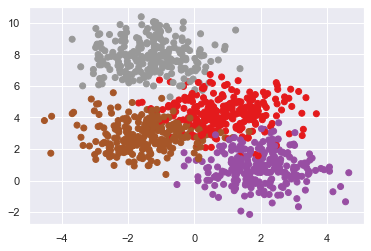

In [4]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap='Set1')

In [5]:
labels = np.mod(labels, 2)

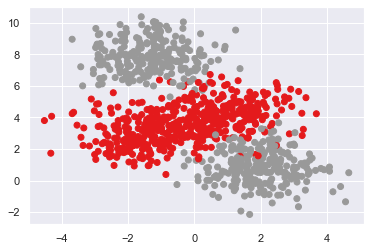

In [6]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap='Set1')

**Split Dataset**

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify=labels, random_state=100)

### Feedforward Network

**Feedforward Network Generic Class**

In [8]:
class FFSNNetwork:
    def __init__(self, n_inputs, hidden_sizes=[2]):
        self.nx = n_inputs
        self.ny = 1
        self.nh = len(hidden_sizes)
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
            self.B[i+1] = np.zeros((1, self.sizes[i+1]))
            
    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))
    def grad_sigmoid(self, x):
        return x*(1-x) 
    
    def forward_pass(self, x):
        self.A = {}
        self.H = {}
        self.H[0] = x.reshape(1, -1)
        for i in range(self.nh+1):
            self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
            self.H[i+1] = self.sigmoid(self.A[i+1])
        return self.H[self.nh+1]
    def grad(self, x, y):
        self.forward_pass(x)
        self.dW = {}
        self.dB = {}
        self.dH = {}
        self.dA = {}
        L = self.nh + 1
        self.dA[L] = (self.H[L] - y)
        for k in range(L, 0, -1):
            self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
            self.dB[k] = self.dA[k]
            self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
            self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
            
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
        if initialise:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
                self.B[i+1] = np.zeros((1, self.sizes[i+1]))
        if display_loss:
            loss = {}
        for e in tqdm(range(epochs), total=epochs, unit="epoch"):
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for x, y in zip(X, Y):
                self.grad(x, y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
            m = X.shape[1]
            for i in range(self.nh+1):
                self.W[i+1] -= learning_rate * dW[i+1] / m
                self.B[i+1] -= learning_rate * dB[i+1] / m
            if display_loss:
                Y_pred = self.predict(X)
                loss[e] = mean_squared_error(Y_pred, Y)
        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
    
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.forward_pass(x)
            Y_pred.append(y_pred)
        return np.array(Y_pred).squeeze()

100%|██████████| 1000/1000 [02:15<00:00,  7.38epoch/s]


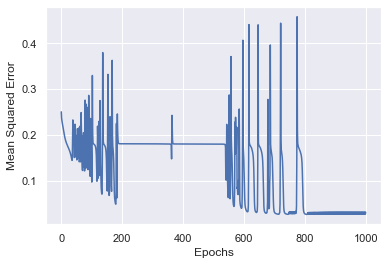

In [9]:
ffsnn = FFSNNetwork(2, [3, 2])
ffsnn.fit(X_train, Y_train, epochs=1000, learning_rate=.01, display_loss=True)

In [10]:
Y_pred_train = ffsnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = ffsnn.predict(X_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_test, Y_test)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.96
Validation accuracy 0.95


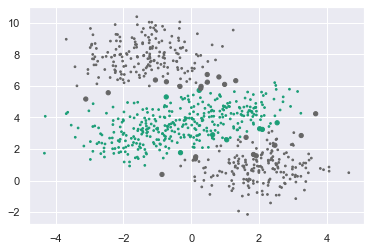

In [11]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_binarised_train, cmap='Dark2', 
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()